In [60]:
import ROOT as rt
import math

In [2]:
c = rt.TCanvas("main_canvas", "Main Canvas", 0, 10, 1920, 1080)

In [10]:
input_data = rt.TFile("data/online/output/mass.root")
input_mc = rt.TFile("mc/online/output/mass_shape.root")

In [11]:
input_data_dist = input_data.Get("h-lambda").FindObject("fTriggeredLambdaDist")
input_data_dist_filter = input_data.Get("h-lambda").FindObject("fTriggeredLambdaDistFilter")
input_mc_dist = input_mc.Get("h-lambda_eff").FindObject("fRecoEtaPtRefitRowsRatioLambdaDist")

Error in <TBufferFile::CheckByteCount>: object of class TList read too many bytes: 1118341408 instead of 44599584
Warning in <TBufferFile::CheckByteCount>: TList::Streamer() not in sync with data on file mc/online/output/mass_shape.root, fix Streamer()


In [12]:
input_mc_dist.GetAxis(0).SetRangeUser(2, 4)
input_data_dist_filter.GetAxis(0).SetRangeUser(2, 4)
input_data_dist.GetAxis(0).SetRangeUser(2, 4)

In [13]:
mc_mass = input_mc_dist.Projection(4)
data_mass_filter = input_data_dist_filter.Projection(3)
data_mass = input_data_dist.Projection(3)

In [14]:
data_mass.SetTitle("#Lambda^{0} invariant mass distribution in data (2 GeV < p_{T} < 4 GeV)")
data_mass.GetXaxis().SetTitle("Mass (GeV/c^{2})")
data_mass.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")
data_mass.Sumw2()
data_mass.SetLineColor(rt.kBlue)

In [16]:
data_mass_filter.SetTitle("#Lambda^{0} invariant mass distribution in data (2 GeV < p_{T} < 4 GeV, old filter bit)")
data_mass_filter.GetXaxis().SetTitle("Mass (GeV/c^{2})")
data_mass_filter.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")
data_mass_filter.Sumw2()
data_mass_filter.SetLineColor(rt.kRed)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


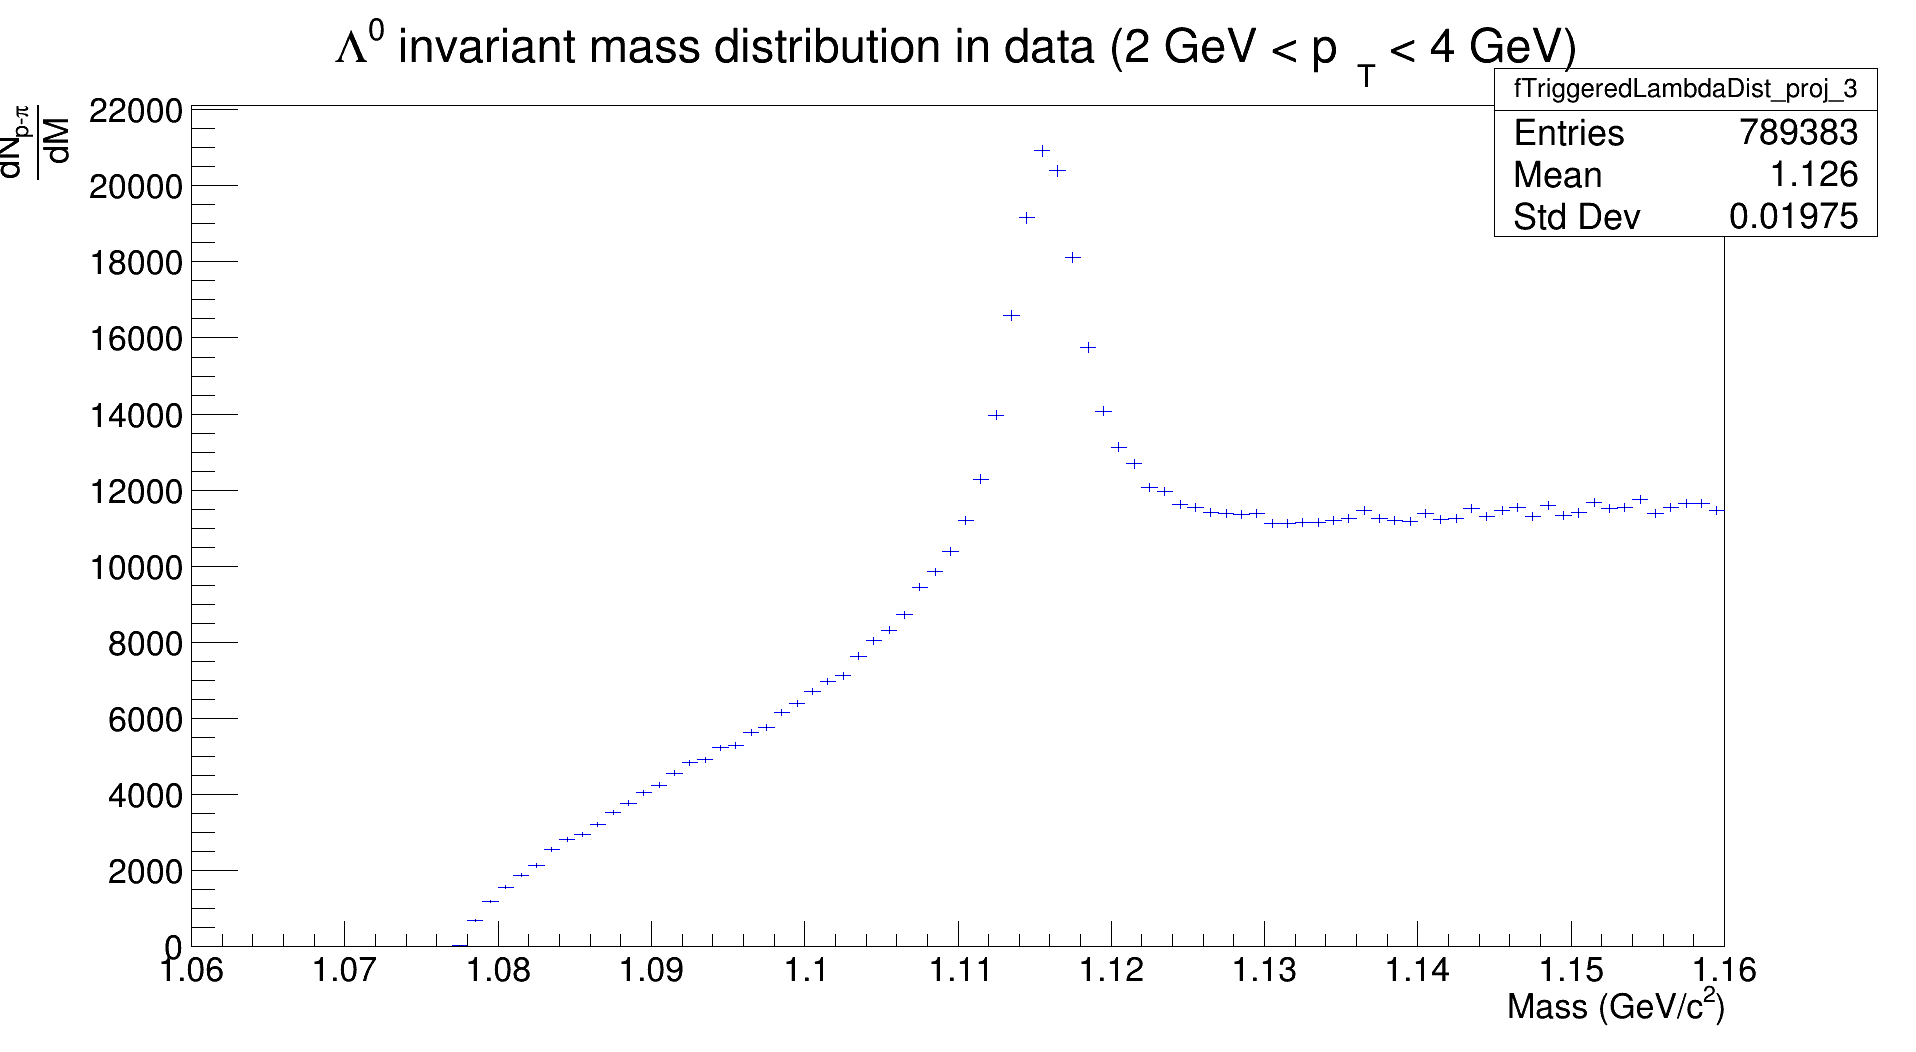

In [18]:
data_mass.Draw()
c.Draw()

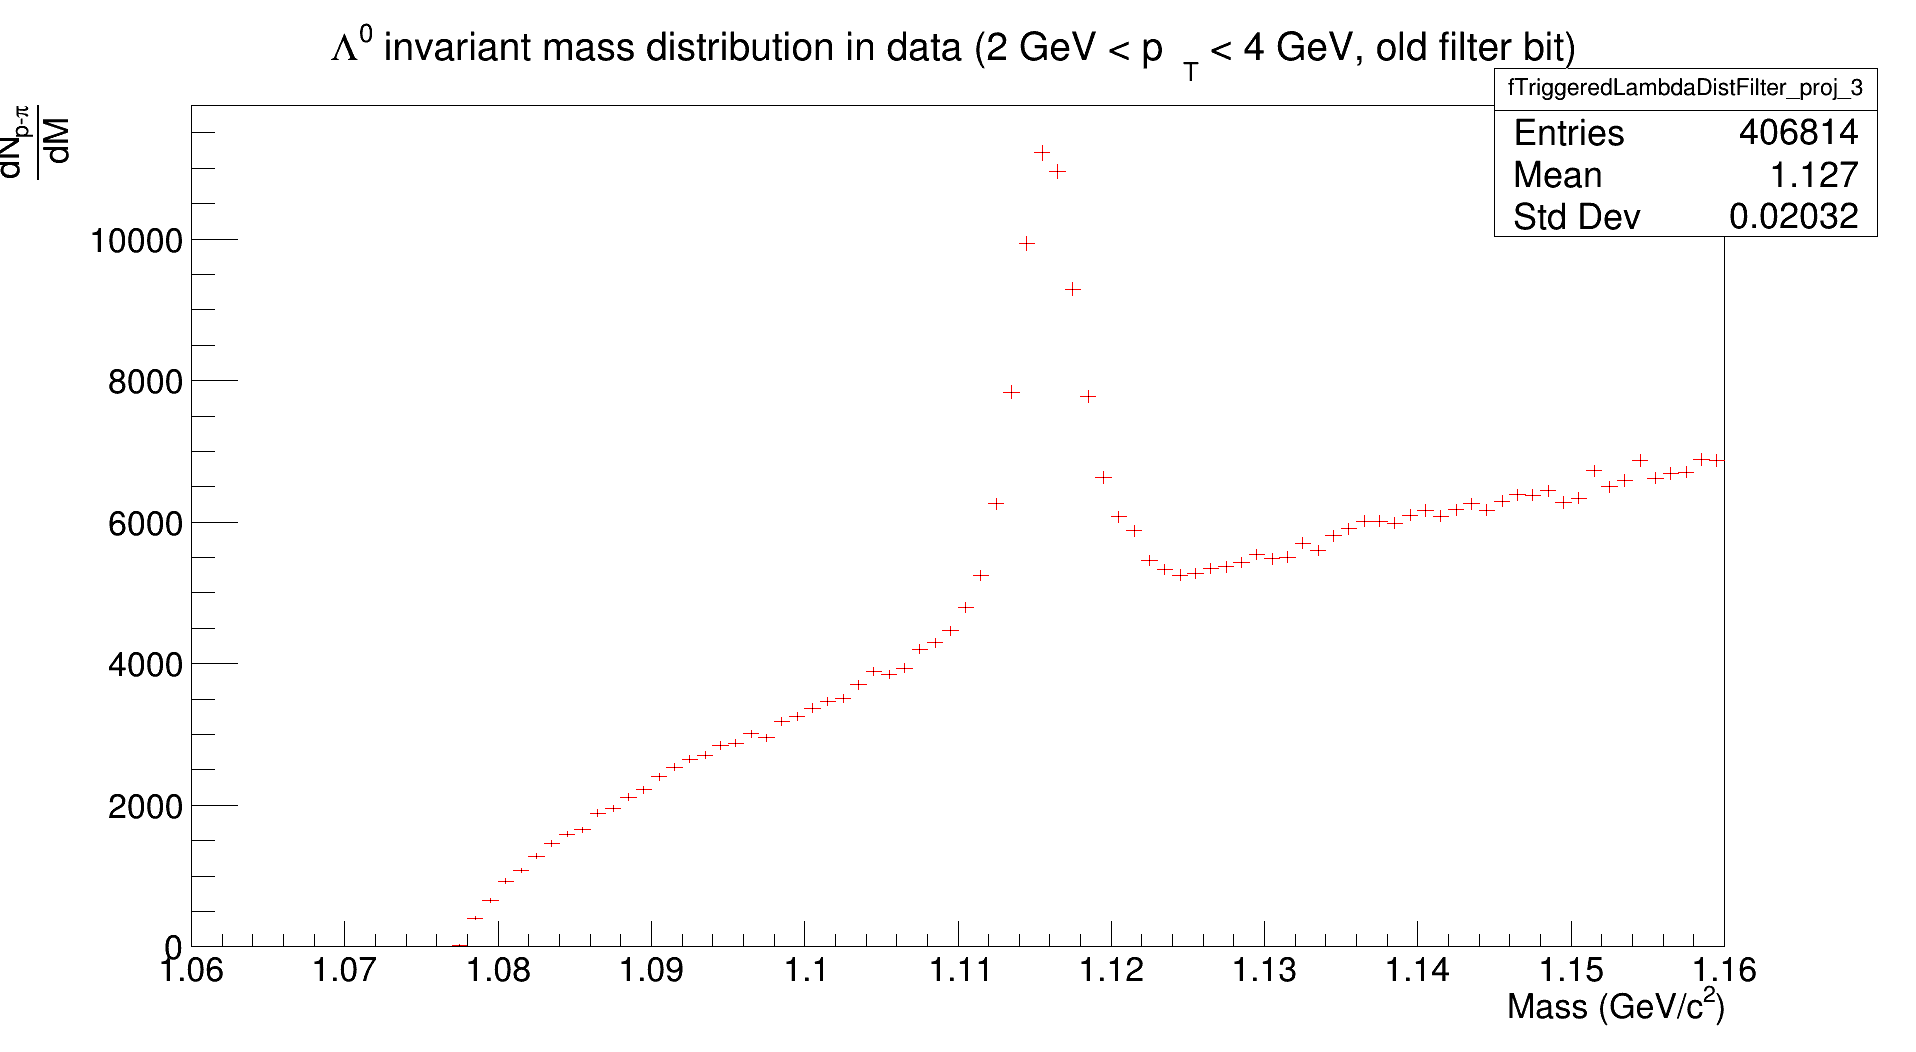

In [19]:
data_mass_filter.Draw()
c.Draw()

In [20]:
mc_mass.SetTitle("#Lambda^{0} invariant mass distribution in MC (2 GeV < p_{T} < 4 GeV)")
mc_mass.GetXaxis().SetTitle("Mass (GeV/c^{2})")
mc_mass.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")
mc_mass.Sumw2()
mc_mass.SetLineColor(rt.kGreen + 2)

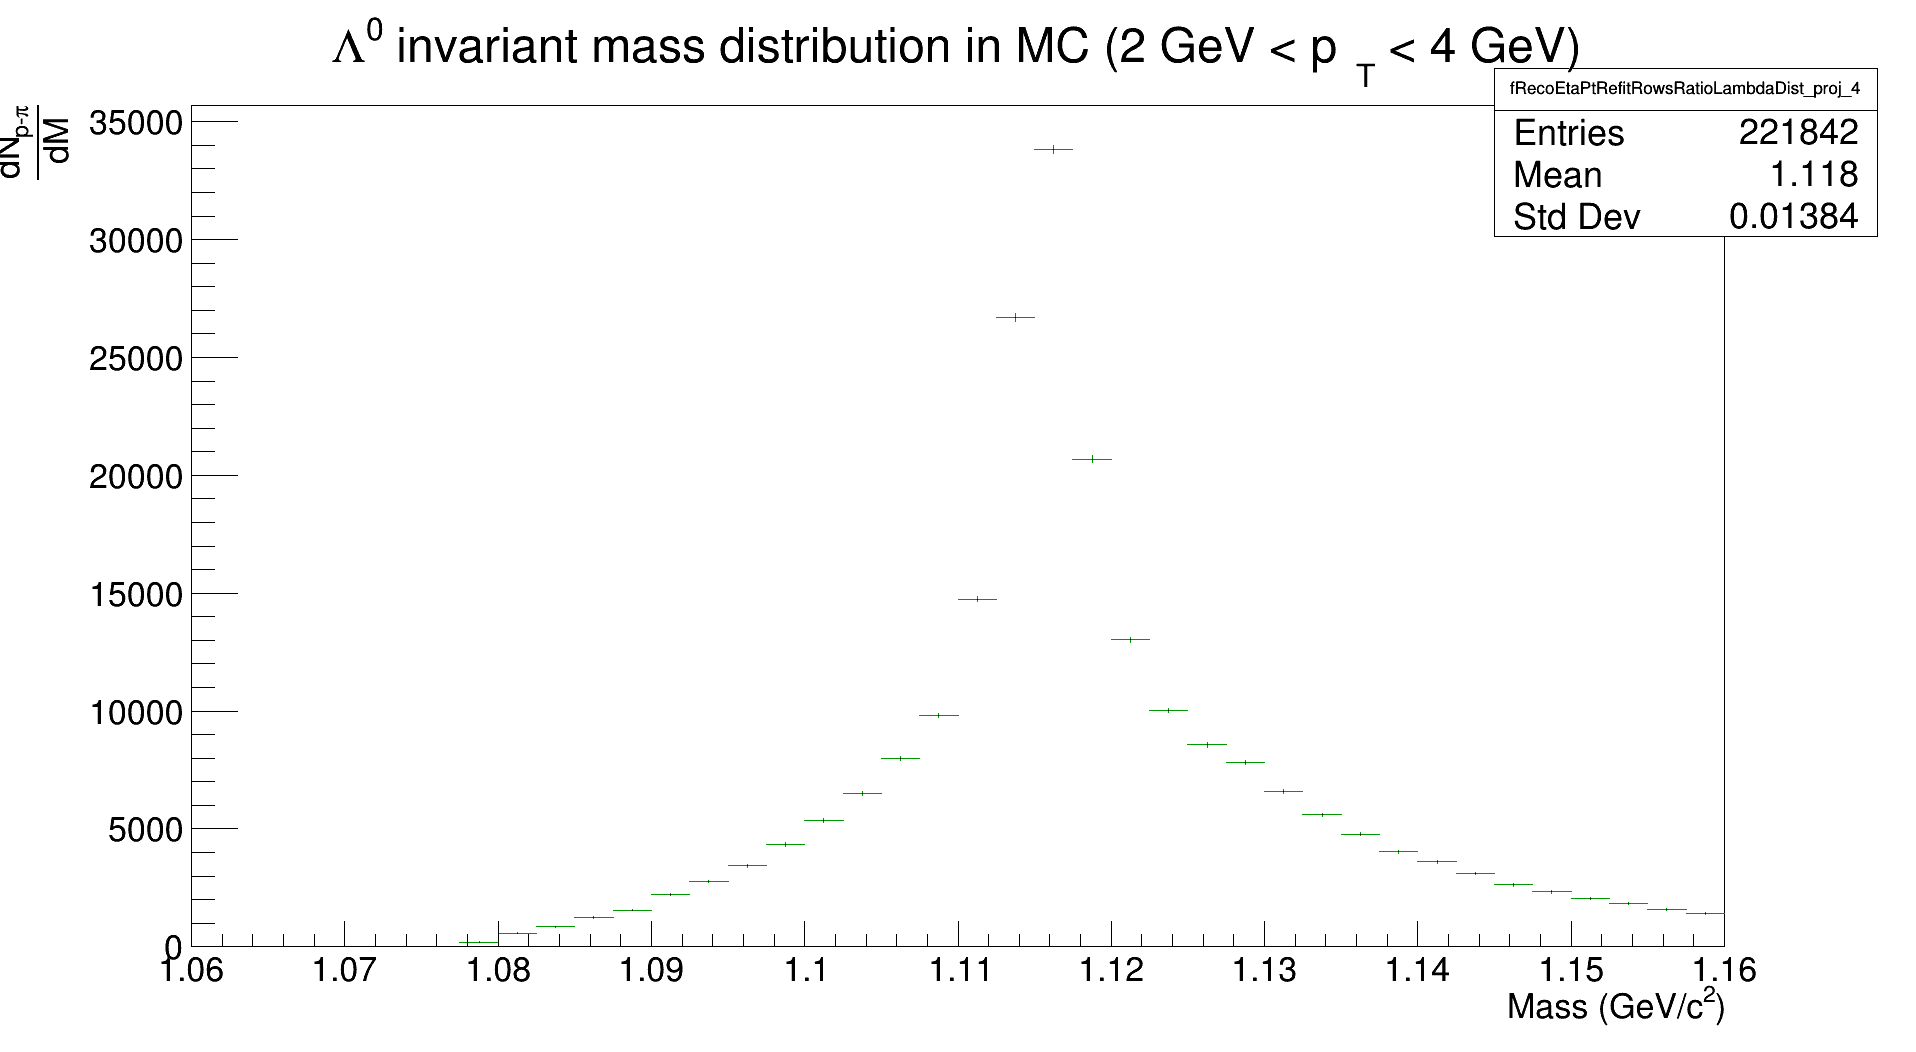

In [21]:
mc_mass.Rebin(2)
mc_mass.Draw()
c.Draw()

In [167]:
mc_fit = rt.TF1("mc_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol1(4)", 1.1, 1.14)
mc_fit.SetLineColor(rt.kMagenta)
mc_fit.SetNpx(1000)

In [168]:
mc_fit.SetParameter(0, 60)
mc_fit.SetParameter(1, 1.1155)
mc_fit.SetParameter(2, 0.0001)
mc_fit.SetParameter(3, 0.003)
mc_fit.SetParameter(4, -8464000)
mc_fit.SetParameter(5, 45100000/3)
# mc_fit.SetParameter(6, -20000000/3)

In [169]:
data_mass.Fit(mc_fit, "RS")

 FCN=27867.3 FROM HESSE     STATUS=FAILED         11 CALLS         335 TOTAL
                     EDM=6.7886e-13    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.78333e+06   3.60000e+01  -0.00000e+00   0.00000e+00
   2  p1           1.14718e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   3  p2          -3.71918e-04   1.41421e+00  -2.51023e-05   0.00000e+00
   4  p3           2.35647e-03   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4          -9.18550e+04   1.66545e+01   3.15332e-09   8.82999e-10
   6  p5           9.20247e+04   1.48862e+01   1.97923e-07  -5.53398e-08


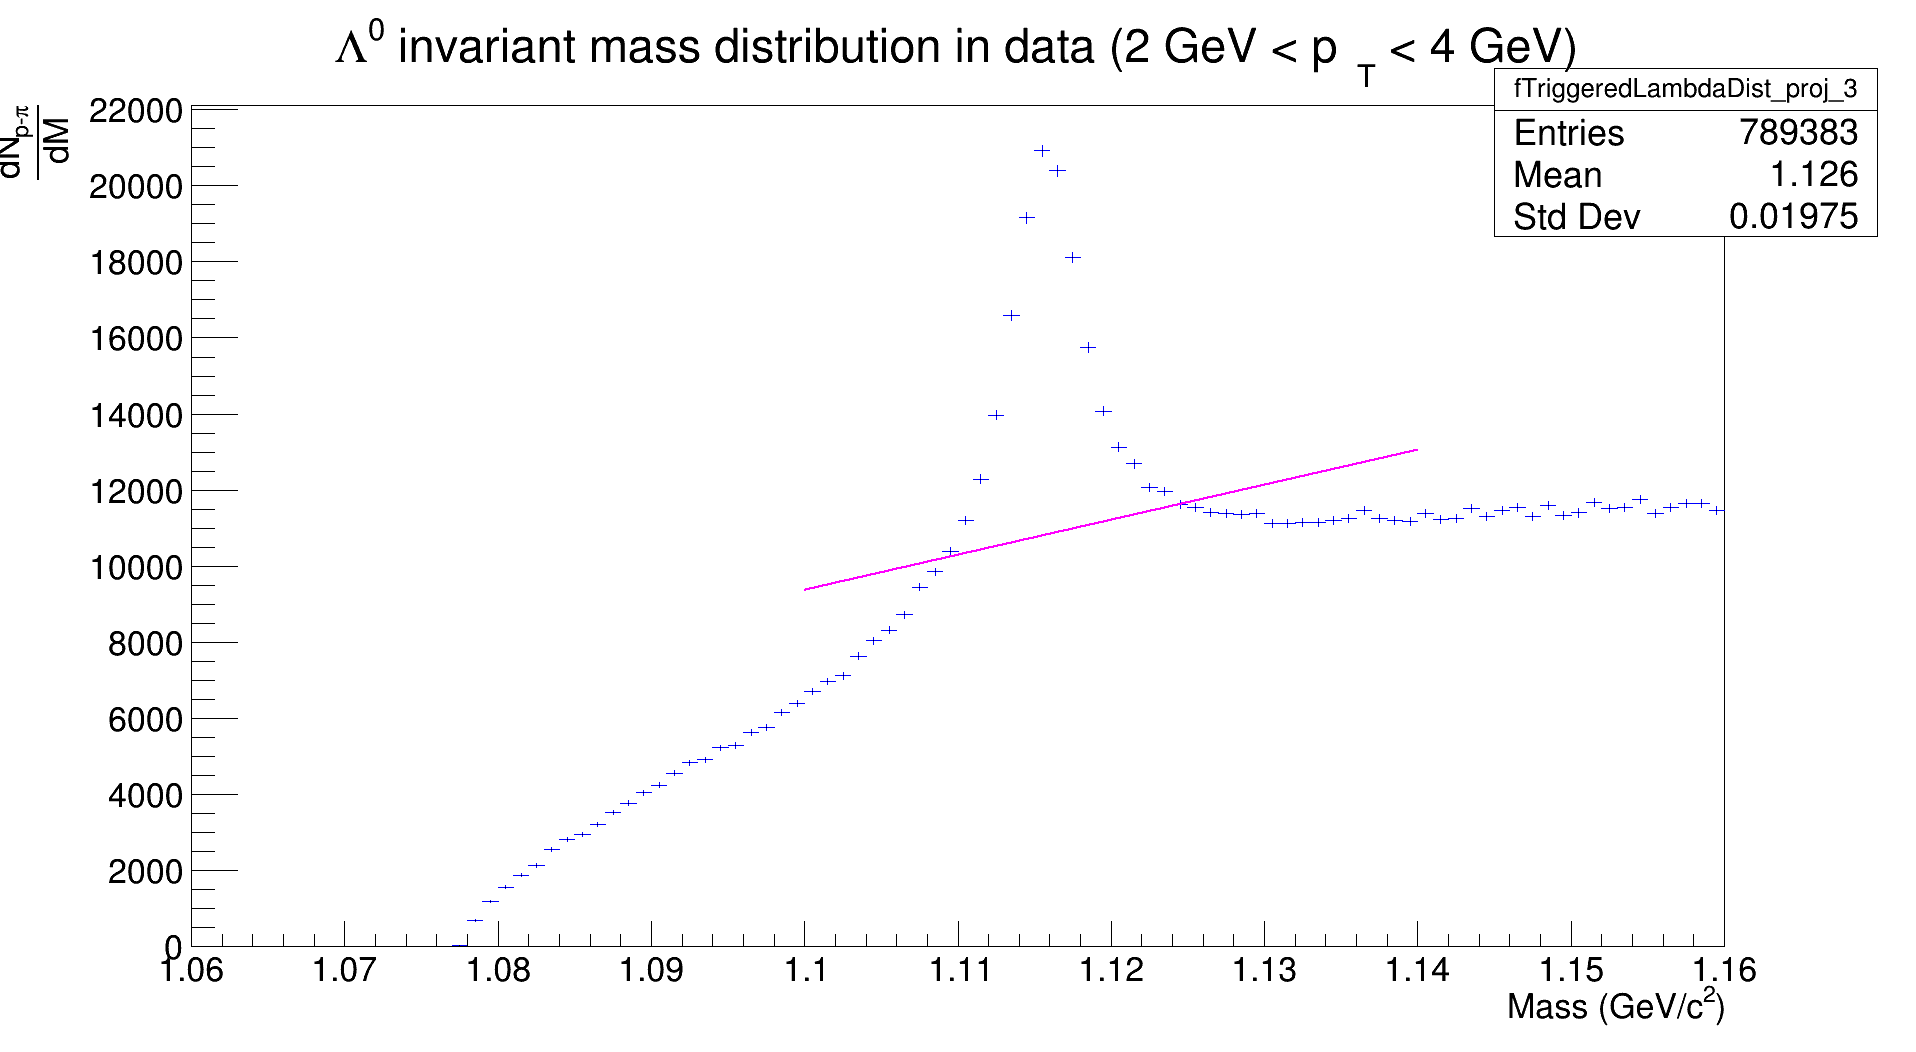

In [170]:
data_mass.Draw()
c.Draw()

In [161]:
bg_fit = rt.TF1("bg_fit", "pol2")
sig_fit = rt.TF1("sig_fit","[0]*TMath::Voigt(x - [1], [2], [3], 4)")
bg_fit.SetParameter(0, mc_fit.GetParameter(4))
bg_fit.SetParameter(1, mc_fit.GetParameter(5))
bg_fit.SetParameter(2, mc_fit.GetParameter(6))
sig_fit.SetParameter(0, mc_fit.GetParameter(0))
sig_fit.SetParameter(1, mc_fit.GetParameter(1))
sig_fit.SetParameter(2, mc_fit.GetParameter(2))
sig_fit.SetParameter(3, mc_fit.GetParameter(3))

Error in <TFormula::GetParameter>: wrong index used - use GetParameter(name)


In [162]:
mean = sig_fit.GetParameter(1)
sigma = sig_fit.GetParameter(3)
sigma_mult_list = [1, 1.2, 1.4, 1.6, 1.8, 2]
for mult in sigma_mult_list:
    sig_int = sig_fit.Integral(mean - mult*sigma, mean + mult*sigma)
    bg_int = bg_fit.Integral(mean - mult*sigma, mean + mult*sigma)
    print(f"Sigma multiplier is: {mult}")
    print(f"Signal/BG is : {sig_int/bg_int}")
    print(f"Significance is : {sig_int/math.sqrt(sig_int + bg_int)}")

Sigma multiplier is: 1
Signal/BG is : nan
Significance is : nan
Sigma multiplier is: 1.2
Signal/BG is : nan
Significance is : nan
Sigma multiplier is: 1.4
Signal/BG is : nan
Significance is : nan
Sigma multiplier is: 1.6
Signal/BG is : nan
Significance is : nan
Sigma multiplier is: 1.8
Signal/BG is : nan
Significance is : nan
Sigma multiplier is: 2
Signal/BG is : nan
Significance is : nan


Error in <GSLError>: Error 21 in qags.c at 553 : bad integrand behavior found in the integration interval
Warning in <TF1::IntegralOneDim>: Error found in integrating function bg_fit in [1.144822,1.149535] using AdaptiveSingular. Result = nan +/- nan  - status = 21
Info in <TF1::IntegralOneDim>: 		Function Parameters = { p0 =  -91854.992013 , p1 =  92024.696174 , p2 =  nan }
Error in <GSLError>: Error 21 in qags.c at 553 : bad integrand behavior found in the integration interval
Warning in <TF1::IntegralOneDim>: Error found in integrating function bg_fit in [1.144351,1.150007] using AdaptiveSingular. Result = nan +/- nan  - status = 21
Info in <TF1::IntegralOneDim>: 		Function Parameters = { p0 =  -91854.992013 , p1 =  92024.696174 , p2 =  nan }
Error in <GSLError>: Error 21 in qags.c at 553 : bad integrand behavior found in the integration interval
Warning in <TF1::IntegralOneDim>: Error found in integrating function bg_fit in [1.143880,1.150478] using AdaptiveSingular. Result = nan +

In [163]:
mc_fit.Delete()

In [173]:
increasing_width = rt.TH1D("increasing_width", "Mean for each fit (increasing p_{T} from left to right)", 4, 0, 4)

Warning in <TFile::Append>: Replacing existing TH1: increasing_width (Potential memory leak).


In [174]:
increasing_width.SetBinContent(1, 1.11568)
increasing_width.SetBinError(1, 2.849e-5)
increasing_width.SetBinContent(2, 1.11578)
increasing_width.SetBinError(2, 4.5875e-5)
increasing_width.SetBinContent(3, 1.11592)
increasing_width.SetBinError(3, 7.571e-5)
increasing_width.SetBinContent(4, 1.11573)
increasing_width.SetBinError(4, 2.173e-5)

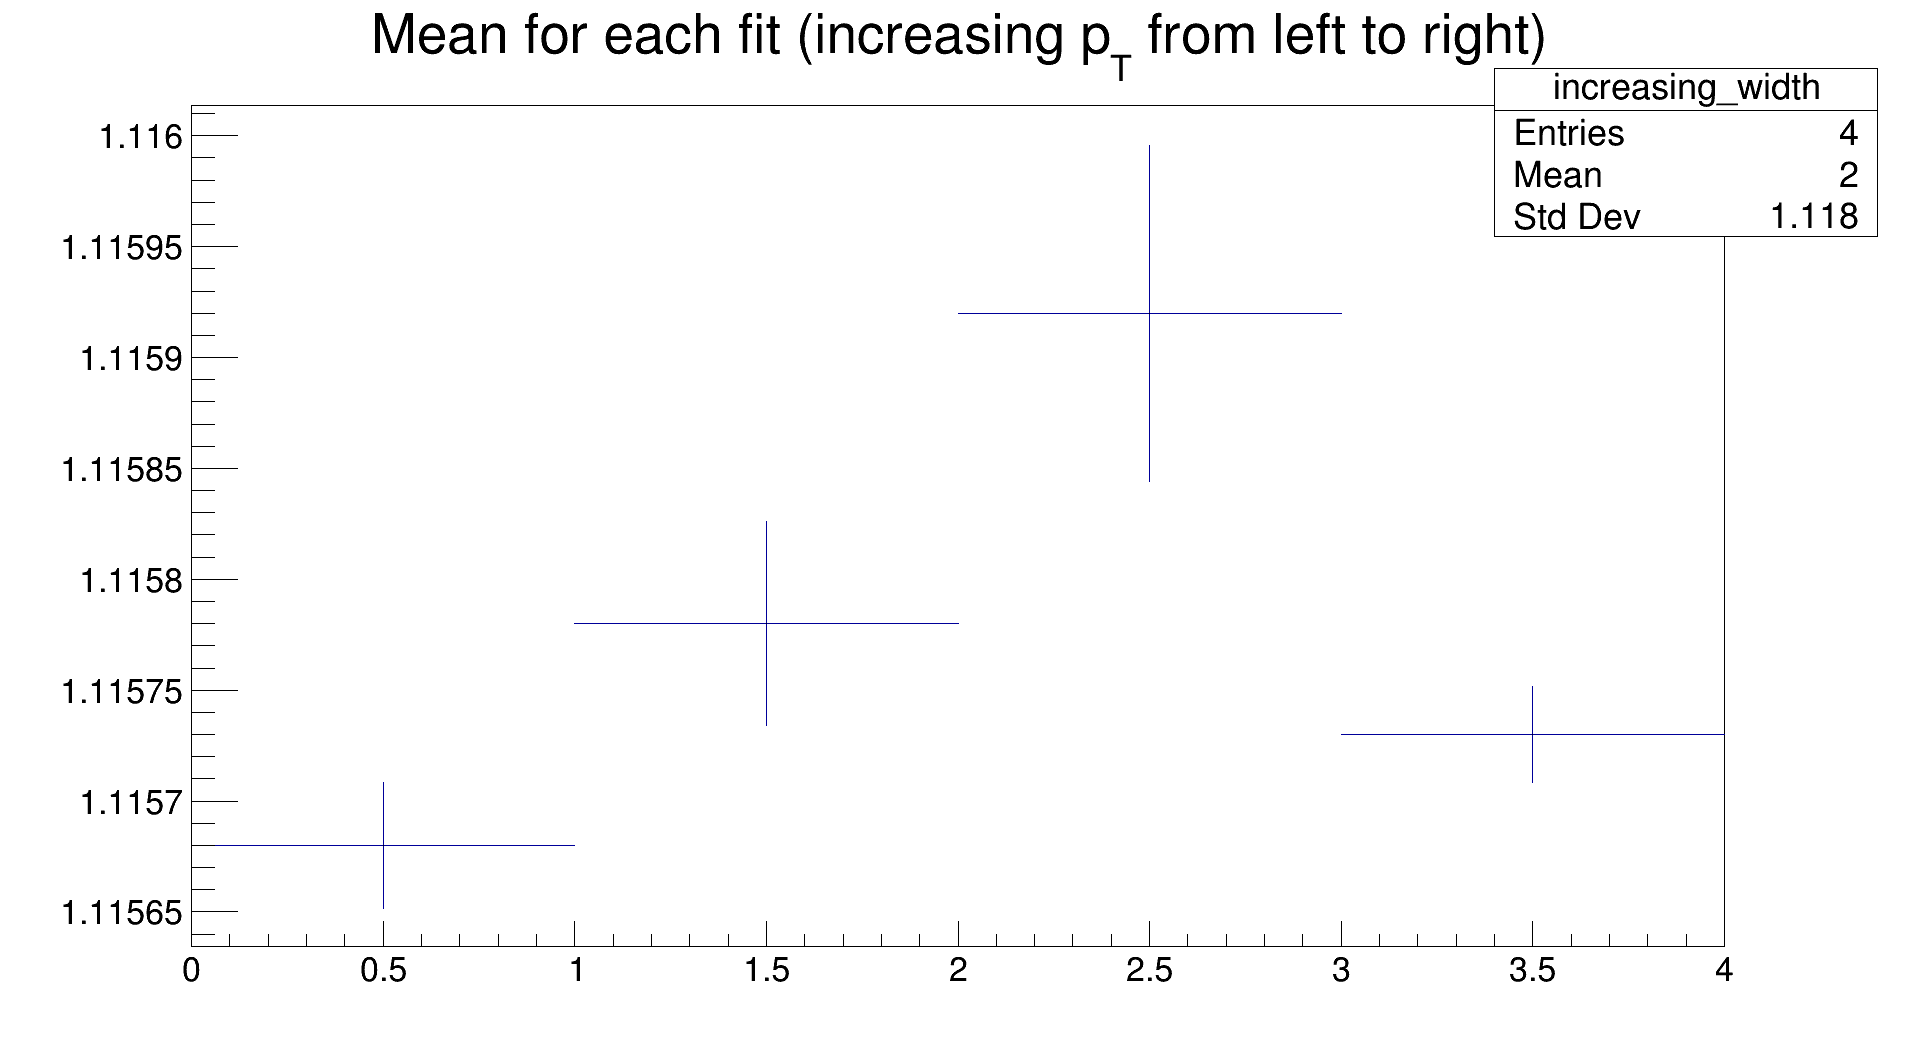

In [175]:
increasing_width.Draw()
c.Draw()

In [ ]:
pt_ranges = [1.6, 1.8, 2, 2.2, 2.4, 2.6, 3, 3.4, 4, 5]
big_c = rt.TCanvas("big_canvas", "Big Canvas", 0, 10, 1920, 1080)
big_c.Divide(3, 3)
for i in range(len(pt_ranges) - 1):
    big_c.cd(i+1)
    pt_low = pt_ranges[i]
    pt_high = pt_ranges[i+1]
    input_mc_dist.GetAxis(0).SetRangeUser(pt_low, pt_high)
    mass_dist = input_mc_dist.Clone(f"pt_{pt_low}_{pt_high}").Projection(4)
    mass_dist.SetTitle(f"#Lambda invariant mass distribution in MC ({pt_low} GeV < p_{{T}} < {pt_high} GeV)")
    mass_dist.GetXaxis().SetTitle("Mass (GeV/c^{2})")
    mass_dist.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")
    mass_dist.Sumw2()
    mass_dist.SetLineColor(rt.kBlue)
    mass_dist.Draw()
big_c.Draw()